Add RSA solution.

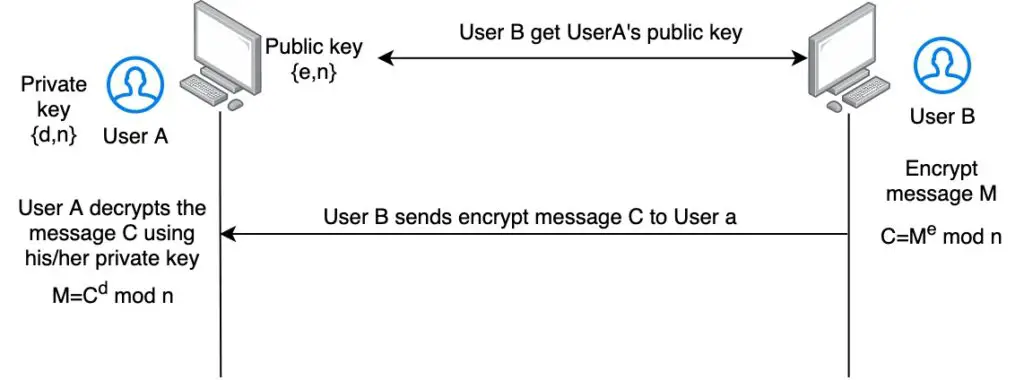

1. Choose p, q, two prime numbers
2. Calculate n = pq
3. Calculate f(n) = (p-1)(q-1)
4. Chose e such that gcd(f(n), e) = 1; 1 < e < f (n), and
5. Chose d, such that ed mod f(n) = 1
6. The private key is {d,n} and the public key is {e,n}
7. To encrypt a message M you use the formula C = Me mod n, where {e,n} is the public key of the receiver you want to send the message.
8. To decrypt the message C, the receiver uses the formula M = Cd mod n, where {d,n} is the private key of the receiver.

In [1]:
p=17; q =7; #Notice 17 and 7 are both prime numbers
n= 17 * 7 #= 119
f_n = (17-1) * (7-1) #=96
e=11 #notice that gcd(96,11)=1 and 1<11<96
d=35 #ed mod f(n) = 1

encrypt = (12 ** e) % n
decrypt = (encrypt ** d) % n
print(encrypt, decrypt)

108 12


In [13]:
def rsa(primeP, primeQ, message):
    publicKeyN = primeP * primeQ
    baseFI = (primeP-1) * (primeQ-1)
    publicKeyE = 2
    for publicKeyE in range(baseFI, 2, -1):
        if baseFI % publicKeyE != 0:
            secretD = int((baseFI + 1) / publicKeyE)
            if ((secretD * publicKeyE) % baseFI) == 1:
                break
    #publicKeyE = 7
    encrypt = (message ** publicKeyE) % publicKeyN
    decrypt = (encrypt ** secretD) % publicKeyN
    print("public-key-N: {}, base-FI-D: {}, public-key-e: {}, secret-key-d: {}, encrypt: {}, decrypt: {}, message: {}".format(publicKeyN, baseFI, publicKeyE, secretD, encrypt, decrypt, message))

rsa(5, 17, 10)
rsa(11, 17, 99) # only works when public-key e is 7 for message in 2-186
rsa(3, 11, 24)   # works for mesage in 2-32 
rsa(13,19, 245)
rsa(5, 7, 12)

public-key-N: 85, base-FI-D: 64, public-key-e: 13, secret-key-d: 5, encrypt: 45, decrypt: 10, message: 10
public-key-N: 187, base-FI-D: 160, public-key-e: 23, secret-key-d: 7, encrypt: 176, decrypt: 99, message: 99
public-key-N: 33, base-FI-D: 20, public-key-e: 7, secret-key-d: 3, encrypt: 18, decrypt: 24, message: 24
public-key-N: 247, base-FI-D: 216, public-key-e: 31, secret-key-d: 7, encrypt: 54, decrypt: 245, message: 245
public-key-N: 35, base-FI-D: 24, public-key-e: 5, secret-key-d: 5, encrypt: 17, decrypt: 12, message: 12


{e,n} is the public key and we intersept the encrypted message em

In [1]:
from dann5.d5 import Qwhole

publicKeyN = Qwhole("n", 35); publicKeyE = Qwhole("e", 5)
primeP = Qwhole(3, "p"); primeQ = Qwhole(3, "q")
nFactors = publicKeyN.assign(primeP * primeQ)
print(nFactors)
print(nFactors.toString(True).replace(";", ";\n"))

n\6q:35\ = (p\3q:U\ * q\3q:U\)
n0\1\ = p0\S\ & q0\S\;
 n1\1\ = _&3\S\ .+ _&1\S\;
 _&3\S\ = p1\S\ & q0\S\;
 _&1\S\ = p0\S\ & q1\S\;
 n2\0\ = _+0\S\ .+ #[n1]\S\;
 _+0\S\ = _&6\S\ + _&4\S\ + _&2\S\;
 _&6\S\ = p2\S\ & q0\S\;
 _&4\S\ = p1\S\ & q1\S\;
 _&2\S\ = p0\S\ & q2\S\;
 n3\0\ = _+1\S\ .+ #[_+0]\S\;
 _+1\S\ = _&7\S\ + _&5\S\ + #[n2]\S\;
 _&7\S\ = p2\S\ & q1\S\;
 _&5\S\ = p1\S\ & q2\S\;
 n4\0\ = _&8\S\ + #[n3]\S\ + #[_+1]\S\;
 _&8\S\ = p2\S\ & q2\S\;
 n5\1\ = #[n4]\0\;
 


In [2]:
from dann5.dwave import Solver
Solver.Active()
print(nFactors.solve())

n\6b:35\; p\3b:7\; q\3b:5\
n\6b:35\; p\3b:5\; q\3b:7\



In [16]:
x = 15; y = 6;
x_mod_y = x % y
print(x_mod_y)
x_mod_y = x - int(x/y) * y
print(x_mod_y)

3
3


In [22]:
from dann5.d5 import Qroutine

x = Qwhole("x", 15); y = Qwhole("y", 6)
div = Qwhole(2, "d"); mod = Qwhole(3, "m")

mode = Qroutine('x mod y') # {
divExp = x >= div * y
modAss = x.assign(mod + div * y)
mode = mode << divExp << modAss << (mod < y)
# } 'x mod y'
print(mode)

Solver.Activate("Hybrid")
mode.reset()
print(mode.solve())

x mod y : {
	(x\6q:15\ >= (d\2q:U\ * y\3q:6\));
	x\6q:15\ = (m\3q:U\ + (d\2q:U\ * y\3q:6\));
	(m\4q:U\ < y\4q:6\);
}
 x\4b:15\ _*18\5b:12\; d\2b:2\; y\3b:6\  x\6b:15\; m\3b:3\; _*19\5b:12\; d\2b:2\; y\3b:6\ m\3b:3\ y\3b:6\ 



In [30]:
encrypt = Qwhole("em", 17); message = Qwhole(4, "m")

# (message ** publicKeyE)
print("m ** {}".format(publicKeyE.value()))
m_on_eXpr = message
for i in range(1, publicKeyE.value()):
    m_on_eXpr = m_on_eXpr * message
print(m_on_eXpr)

m ** 5
((((m\4q:U\ * m\4q:U\) * m\4q:U\) * m\4q:U\) * m\4q:U\)


In [32]:
div = Qwhole(2, "d")

# encrypt =  m_on_eXpr  % publicKeyN
mode = Qroutine('m_on_eXpr % publicKeyN') # {
divExp = m_on_eXpr >= div * publicKeyN
modAss = m_on_eXpr == encrypt + div * publicKeyN
mode = mode << divExp << modAss #<< (encrypt < publicKeyN)
# } 'x mod y'
print(mode)

mode.reset()
print(mode.solve())

m_on_e mod publicKeyN : {
	(((((m\4q:U\ * m\4q:U\) * m\4q:U\) * m\4q:U\) * m\4q:U\) >= (d\2q:U\ * n\6q:35\));
	(((((m\4q:U\ * m\4q:U\) * m\4q:U\) * m\4q:U\) * m\4q:U\) == (em\5q:17\ + (d\2q:U\ * n\6q:35\)));
}
 _*40\20b:96\; _*39\16b:1296\; _*38\12b:216\; _*37\8b:36\; m\4b:6\; m\4b:6\; m\4b:6\; m\4b:6\; m\4b:6\ _*43\8b:64\; d\2b:2\; n\6b:35\  _*40\20b:96\; _*39\16b:1296\; _*38\12b:216\; _*37\8b:36\; m\4b:6\; m\4b:6\; m\4b:6\; m\4b:6\; m\4b:6\; _+603\9b:87\; em\5b:17\; _*44\8b:70\; d\2b:2\; n\6b:35\



In [5]:
a = Qwhole(6, "a"); b = Qwhole(6, "b"); c = Qwhole(6, "c"); P = Qwhole("P", 13547)
product = P.assign(a * b * c)
print(product)
Solver.Activate("Hybrid")
print(product.solve())

P\18q:13547\ = ((a\6q:U\ * b\6q:U\) * c\6q:U\)
P\18b:13547\; _*5\12b:437\; a\6b:19\; b\6b:23\; c\6b:31\



In [6]:
a = Qwhole(6, "a"); b = Qwhole(6, "b"); c = Qwhole(6, "c"); P = Qwhole("P", 13548)
product = P.assign(a * b * c)
print(product)
Solver.Activate("Hybrid")
print(product.solve())

P\18q:13548\ = ((a\6q:U\ * b\6q:U\) * c\6q:U\)
P\18b:13548\; _*7\12b:238\; a\6b:34\; b\6b:7\; c\6b:58\



In [11]:
from dann5.d5 import Qblock

m = Qwhole(12, "m")
product1 = m.assign(a * b)
product2 = P.assign(m * c)

product = Qblock() << product2 #<< product1
print(product)
Solver.Activate("Hybrid")
print(product.solve())

{
	P\18q:13548\ = (m\12q:U\ * c\6q:U\);
}
 P\18b:13548\; m\12b:2258\; c\6b:6\



In [ ]:
decryptBloc = Qblock() << powAss 